# Using Python for probability calculations

In this blog post,
we'll show the power of the "Python calculator" for doing probability calculations and understand probability concepts.
This is Part 2 of the *Python for statistics* blog post series.


Click [here](https://mybinder.org/v2/gh/minireference/noBSstats/HEAD?urlpath=%2Fdoc%2Ftree%2Fblogposts%2Fprobability_models.ipynb)
to run the notebook interactively,
so you can play with the code examples.

### Notebook setup

In [1]:
# Install stats library
%pip install --quiet ministats 


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Figures setup
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()  # needed otherwise `sns.set_theme` doesn't work
sns.set_theme(
    style="whitegrid",
    rc={'figure.figsize': (7, 2)},
)
# High-resolution figures please
%config InlineBackend.figure_format = 'retina'

<Figure size 640x480 with 0 Axes>

## Introduction

Probability theory is the foundation of all statistical analysis techniques. The concept of a random variable, denoted $X$, is a key building block in probability theory. The random variable $X$ is a quantity that can take on different values, and it is described by a probability distribution function $f_X$, which we use to compute the probability of different possible outcomes of the random variable $X$.

It's important to learn a little bit of probability theory (random variables, probability distributions, formulas, calculations, etc.), because we need this foundational knowledge to understand statistics. Luckily, we can use computer models for random variables to help us with probability calculations.

- Claim 1: The Python ecosystem provides lots of tools for doing probability calculations.
- Claim 2: Learning PROB+Python is more efficient than trying to learn PROB without Python.


## Probability models

The concept of a random variable, denoted $X$, is a key building block in probability theory. The random variable $X$ is a quantity that can take on different values, and it is described by a probability distribution function $f_X$, which we use to compute the probability of different possible outcomes of the random variable $X$.

When learning about random variables, readers are usually exposed to numerous formulas and equations for describing probability distributions. These math equations can be hard to understand, especially for people who haven't done math recently. Using computer models, however, makes probability concepts much more accessible. Specifically, computers give us two additional points of view of the math equations:

- **Visualizations**. Plotting the probability distribution $f_X$ for the random variable $X$ gives you a visual representation of the possible values this variable can have.
- **Computer-assisted calculations**. Probability calculations can be done easily using Python as a calculator.


## Definitions

- outcome
- event
- PMF/PDF
- CDF
- probability


Python libraries we'll use this blog post:
- NumPy
- SciPy
- Seaborn
- 

## Example 1: discrete random variable

TODO: import from cut material

coin flip?

$C \sim \textrm{Bernoulli}(p=0.5)$

`def fC` using random.rand() > 0.5

ALT1. np.random.randint(2)

ALT2. scipy.stats bernoulli

In [3]:
import numpy as np
np.random.randint(2)

1

## Example 2: continuous random variable

### Computer models for random variables

The standard normal distribution is denoted $Z \sim \mathcal{N}(\mu=0,\sigma=1)$.
The `~` symbol is read "distributed according to" and $\mathcal{N}(\mu=0,\sigma=1)$ describes the normal model with parameter: mean $\mu=0$ and standard deviation $\sigma=1$. 


The probability density function of the standard random variable $Z$ is
\[
    f_Z(z) = \tfrac{1}{\sqrt{2\pi}} e^{ - \frac{1}{2}z^2}.
\]


This is a complicated math expression involving multiple functions: square, division, the exponential, and a normalizing constant involving $\pi$. It hurts the brain just to look at this math, and trying to do calculations would hurt even more!




The standard normal is a special case of the general normal $\mathcal{N}(\mu, \sigma)$
where $\mu$ is the mean and $\sigma$ is the standard deviation.







We can use the predefined probability model from the Python module `scipy.stats` whenever we need to do probability calculations.
This module contains implementations of all the important probability distributions: uniform, Poisson, beta, Student's t, normal, exponential, chi-square, etc.


To create a computer model for the standard normal random variable $Z \sim \mathcal{N}(\mu=0, \sigma=1)$, we first import the `norm` model family from `scipy.stats` then call `norm(0,1)` to initialize the model with parameters $\mu=0$ and $\sigma=1$.

In [4]:
from scipy.stats import norm
rvZ = norm(0, 1)

The model first parameter is the mean $\mu=0$,
which is also know as the *location* parameter of the distribution–where it is centred.
The second parameter is the standard deviation $\sigma=1$,
which is also known as the *scale* parameter and controls the width.
The Python keyword for the model parameters are `loc` and `scale`,
so another way to create the random variable object `rvZ` is `norm(loc=0, scale=1)`.

The probability density function $f_Z$ is available as the `.pdf` method on the computer model `rvZ`. To find the probability density at $z=1$, use the following code:

In [5]:
rvZ.pdf(1)

np.float64(0.24197072451914337)

The computer model `rvZ` has other useful methods like `.cdf(b)`
to compute the cumulative distribution function,
`.rvs(n)` to generate random samples,
`.mean()` to compute the mean of the random variable, etc.


### Probability model visualizations

We'll now use the Seaborn plotting library to visualize the probability distributions of the random variable $Z$. Achieving an intuitive understanding of random variables is greatly facilitated when you can "see" their distributions. Here is the Python code to plot the probability density function of the random variable $Z = `rvZ`$ over the range of values from -4 to 4.


Text(0.5, 1.0, 'Probability density function of the standard normal $Z \\sim \\mathcal{N}(0,1)$.')

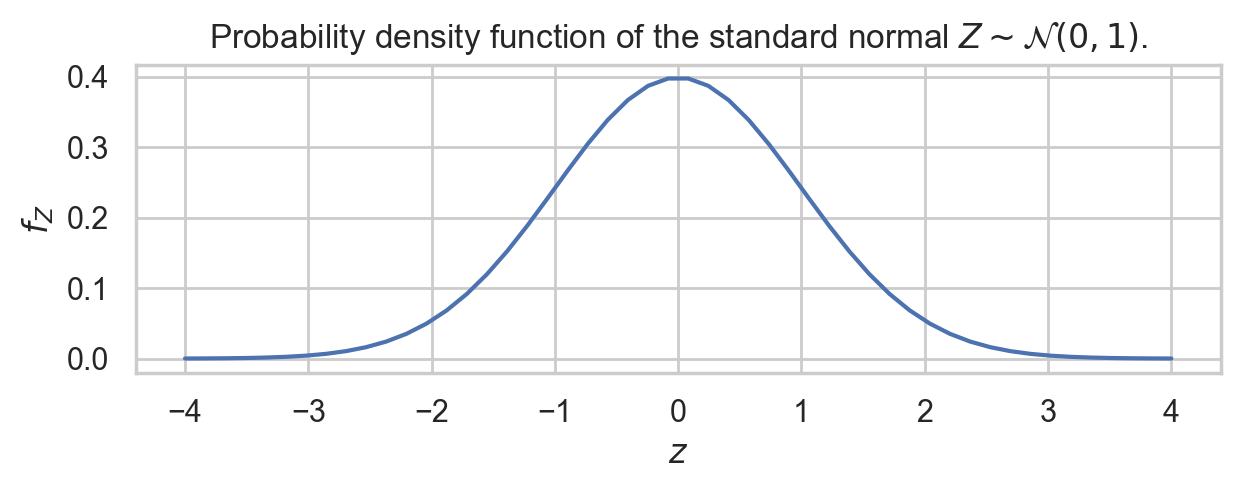

In [6]:
import numpy as np
zs = np.linspace(-4, 4)
fZs = rvZ.pdf(zs)
ax = sns.lineplot(x=zs, y=fZs)
ax.set_xticks(range(-4,5))
ax.set_xlabel("$z$")
ax.set_ylabel("$f_Z$")
ax.set_title(r"Probability density function of the standard normal $Z \sim \mathcal{N}(0,1)$.")

The first two lines import the `numpy` and `seaborn` libraries under the usual aliases. On the third line we create a NumPy array of inputs `zs` that contains 1000 numbers between -4 and 4. The fourth line evaluates $f_Z =$`rvZ.pdf` for all the inputs in the array `zs`.  This function call is vectorized: the probability density function is evaluated  for all 1000 values in parallel. On the fifth line we call the `sns.lineplot` function to generate the plot that we see in the following figure.

The above graph tells you everything you need to know about the random variable $Z$.
The possible values of $Z$ are concentrated around the mean $\mu=0$.
The region of highest density is roughly between $z=-1$ and $z=1$,
with most of values between $z=-2$ and $z=2$,
then the probability density drops off to (almost) zero for $z<-3$ and $z>3$.

### Doing probability calculations

Computer models for random variables allow us to perform complex probability calculations using just a few lines of code. Historically, statistics students were expected to use [lookup tables](https://en.wikipedia.org/wiki/Standard_normal_table) for probability distributions, but now that we have Python on our side, we can throw out the lookup tables.

Calculating probabilities with the continuous random variable $Z$ requires using *integration*,
which the process of computing the total area under a curve for some region.

We can calculate integrals using the function `scipy.integrate.quad`. The math concept of the integral of the function $f(x)$ between $x=a$ and $x=b$ is denoted $\int_{x=a}^{x=b} f(x) dx$.  We need to compute integrals every time we want to "add up" the total amount of $f(x)$ between the endpoints $x=a$ and $x=b$. The code equivalent for this integral is written `quad(f,a,b)`, where `quad` is a function defined in `scipy.integrate`. In other words, if you learn a bit of Python, you can skip two years of university-level calculus courses (CALC 101 derivatives and CALC 102 integrals).

For example, to find the probability that the random variable $Z$ falls between $1$ and $2$, we have to calculate the following integral $\textrm{Pr}(\{1 \leq Z \leq 2\}) = \int_{z=1}^{z=2} f_Z(z) dz$. The code for calculating this integral is shown next, and the visualization of this integral as the area under the curve is shown in the figure below.

In [7]:
from scipy.integrate import quad
quad(rvZ.pdf, a=1, b=2)[0]

0.13590512198327787

Text(0.5, 1.0, 'The probability of the event $\\{1 \\leq Z \\leq 2\\}$ corresponds to the area in red.')

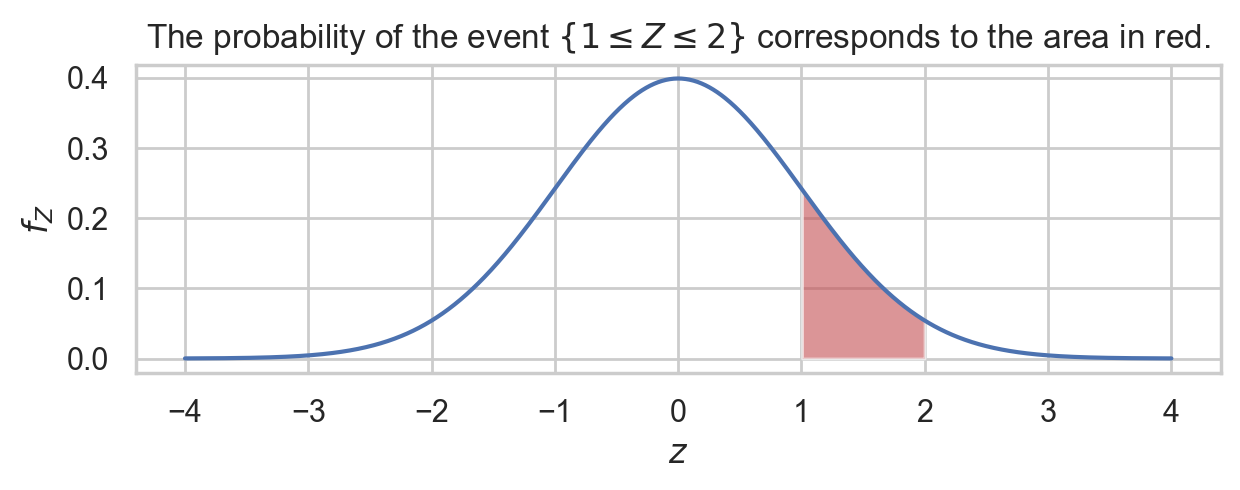

In [8]:
zs = np.linspace(-4, 4, 1000)
fZs = rvZ.pdf(zs)
ax = sns.lineplot(x=zs, y=fZs)
mask = (1 < zs) & (zs < 2)
ax.fill_between(zs[mask], y1=fZs[mask], alpha=0.6, facecolor="C3")
ax.set_xticks(range(-4,5))
ax.set_xlabel("$z$")
ax.set_ylabel("$f_Z$")
ax.set_title(r"The probability of the event $\{1 \leq Z \leq 2\}$ corresponds to the area in red.")
# TODO: add text label "$\{1 \leq Z \leq 2\}$" and arrow pointing towards region

The probability of the event $\{1 \leq Z \leq 2\}$ corresponds to the area in red.

### Random samples

One of the recurrent themes in statistics is the generation of random samples from probability distributions. Many concepts are theorems in probability and statistics describe the limit of repetition of some calculation. 

To generate a random sample of size $n$ from the random variable `rvZ`,
call the method `rvZ.rvs(n)`.

In [9]:
np.random.seed(46)
zs = rvZ.rvs(10)
zs

array([ 0.58487584,  1.23119574,  0.82190026, -0.79922836,  0.41205323,
       -0.17615661, -0.07317197, -0.56566639, -0.09346524,  0.85730108])

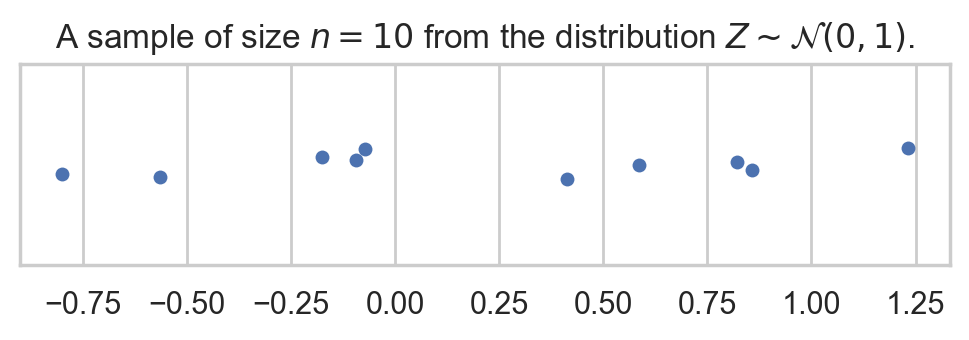

In [10]:
with plt.rc_context({"figure.figsize":(6,1.3)}):
    ax = sns.stripplot(x=zs)
    ax.set_title(r"A sample of size $n=10$ from the distribution $Z \sim \mathcal{N}(0,1)$.")

Computer simulations of random samples allow us to simulate the samples of values from any probability distribution. These simulations allow us to experimentally verify the math formulas used in probability theory. This notion of simulation of random events is a powerful idea that we use throughout the book.

Every math formula, theorem, or equation can be verified by running a computer simulation. The generative process of samples followed by calculations that observe what happens, then compare with analytical formulas and claims given as mathematical formulas. Basically, if you know how to do probability simulations, you won't have to take any math formula on "trust" but can instead run simulations to verify the predictions of the formula match what you observe in your simulation.


### Normal distributions with different parameters

The standard normal distribution $\mathcal{N}(\mu=0, \sigma=1)$ is just one representative of the family of normal distributions. The mean parameter $\mu$ (the Greek letter mu) and standard deviation parameter $\sigma$ (the Greek letter sigma) control the shape of the normal distribution. We can experiment with the different choices of parameters for the normal model to see what shape of distribution we get.

Here are some examples of graphs of the normal distribution for different parameters $\mu$ and $\sigma$.

Saved figure to figures/normal_panel.pdf
Saved figure to figures/normal_panel.png


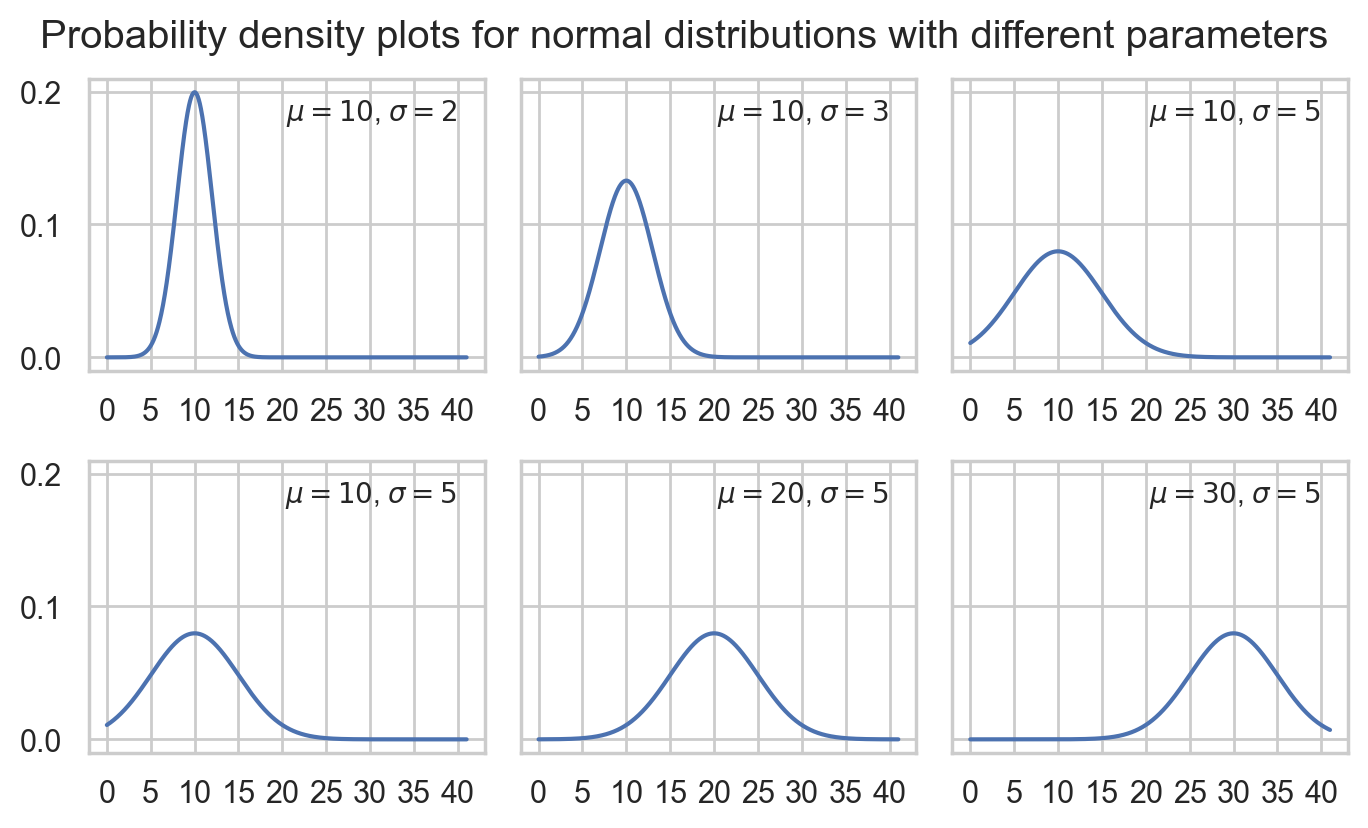

In [11]:
import os
from ministats import generate_pdf_panel

xs = np.linspace(0, 41, 1000)
xticks = np.arange(0, 41, 5)

# parameter dicts (list of lists)
params_matrix = [
    [dict(loc=10, scale=2),  dict(loc=10, scale=3),  dict(loc=10, scale=5)],
    [dict(loc=10, scale=5),  dict(loc=20, scale=5),  dict(loc=30, scale=5)],
]

params_to_latex = {
    "loc": r"\mu",
    "scale": r"\sigma",
}

with plt.rc_context({"figure.figsize": (7, 4)}):
    fig = generate_pdf_panel("figures/normal_panel.pdf", xs, norm, params_matrix,
                             params_to_latex=params_to_latex,
                             xticks=xticks)
    fig.suptitle("Probability density plots for normal distributions with different parameters", y=1.03)

Basically $\mu$ determines the location of the "bell" and $\sigma$ determines the width of the bell.

There are many of other probability distributions that can be useful for modelling various real world quantities. You can take a look at the probability graphs
of [discrete distribution here](https://nobsstats.com/notebooks/26_inventory_continuous_dists.html) and [continuous distributions here](https://nobsstats.com/notebooks/23_inventory_discrete_dists.html).

## Applications

### Probability model for the general population

TODO: insert condensed intro IQs scenario

Let's now build the specific probability model we need for the analysis of the students' IQ scores.
We know the IQ scores in the general population has mean $\mu=100$ and standard deviation $\sigma=15$.
We will denote the general population as $X \sim \mathcal{N}(\mu=100,\sigma=15)$.


Text(0, 0.5, '$f_{X}$')

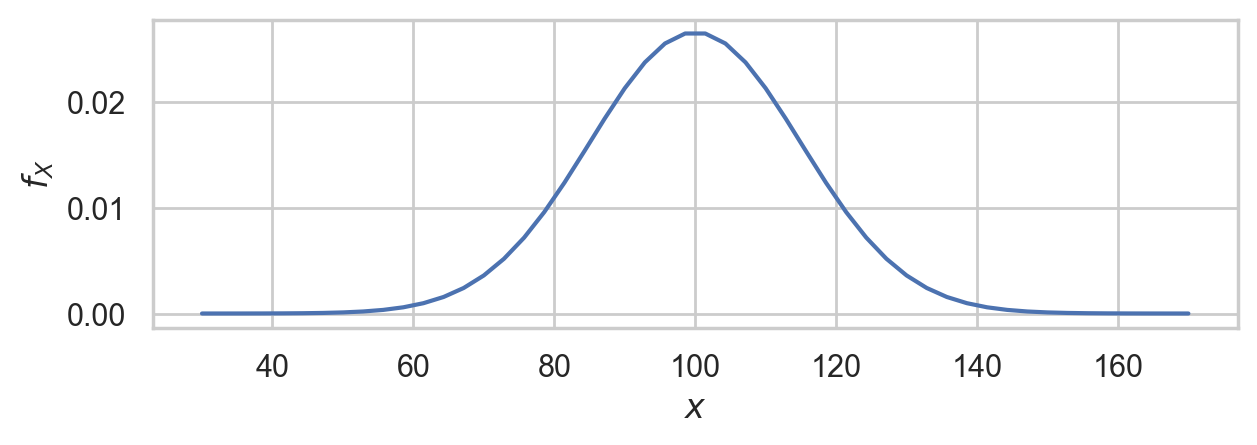

In [12]:
import numpy as np
from scipy.stats import norm

mu = 100
sigma = 15
rvX = norm(mu, sigma)

xs = np.linspace(30, 170)
ax = sns.lineplot(x=xs, y=rvX.pdf(xs));
ax.set_xlabel("$x$")
ax.set_ylabel("$f_{X}$")

This is the distribution of IQ scores we can expect to observe for the general population.

### Random samples from the general population

We'll use the notation $\mathbf{X} = (X_1, X_2, \ldots, X_{30})$ to describe a *random sample* from the general population $X \sim \mathcal{N}(\mu=100,\sigma=15)$.


To get a idea of what these random samples look like,
we can generate $10$ samples $\mathbf{x}_1, \mathbf{x}_2, \mathbf{x}_3, \ldots, \mathbf{x}_{10}$ of size $n=30$ from $X \sim \mathcal{N}(\mu=100, \sigma=15)$ as follows.

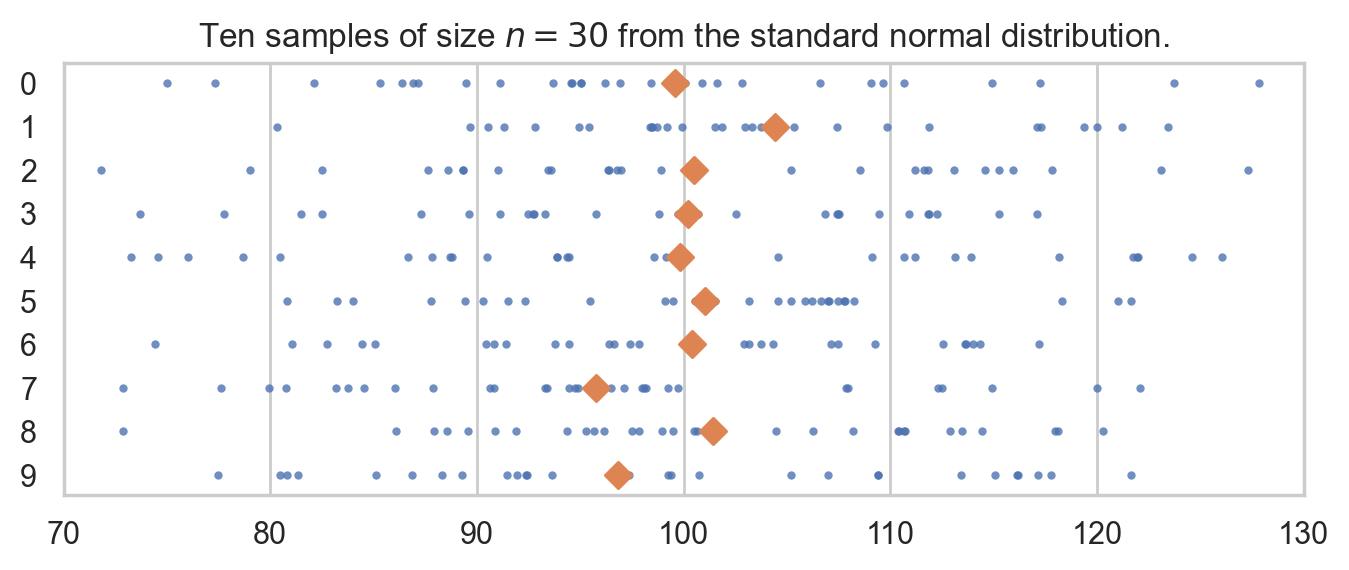

In [13]:
np.random.seed(5)

samples = [rvX.rvs(30) for j in range(10)]


with plt.rc_context({"figure.figsize":(8,2.8)}):
    ax = sns.stripplot(samples, orient="h", s=3, color="C0", alpha=0.8, jitter=0)
    ax.set_xlim([70,130])
    for i, sample in enumerate(samples):
        xbar = np.mean(sample)
        ax.scatter(xbar, i, marker="D", s=45, color="C1", zorder=10)
    ax.set_title("Ten samples of size $n=30$ from the standard normal distribution.")

The diamond markers indicate the position of the sample means computed from each sample:
$[\overline{\mathbf{x}}_1, \overline{\mathbf{x}}_2, \overline{\mathbf{x}}_3, \ldots, \overline{\mathbf{x}}_{10}]$.


In the next section we're going to talk about the distribution of the diamond shapes,
which correspond to the means computed from random samples.

### Understanding sampling distributions

The sampling distribution is one of the most complex ideas in STATS 101 that many readers find difficult to understand. The good news is that once you understand sampling distributions, you will understand the common factor behind all the formulas and procedures.

We'll learn about this in the next blog post: [sampling_distributions.ipynb](./sampling_distributions.ipynb).

## Conclusion

## Links